# Linear Regression

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../data/weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


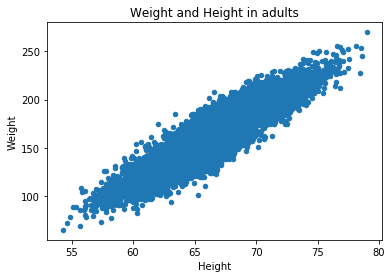

In [4]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

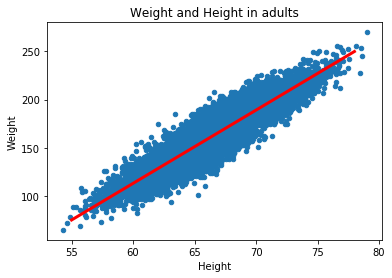

In [5]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

# Here we're plotting the red line 'by hand' with fixed values
# We'll try to learn this line with an algorithm below
plt.plot([55, 78], [75, 250], color='red', linewidth=3)

In [6]:
def line(x, w=0, b=0):
    return x * w + b

In [7]:
x = np.linspace(55, 80, 100)

In [8]:
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [9]:
yhat = line(x, w=0, b=0)

In [10]:
yhat

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

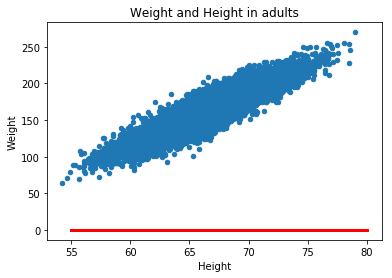

In [11]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(x, yhat, color='red', linewidth=3)

### Cost Function

In [12]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred)**2
    return s.mean()

In [13]:
X = df[['Height']].values
y_true = df['Weight'].values

In [14]:
y_true

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

In [15]:
y_pred = line(X)

In [16]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [17]:
mean_squared_error(y_true, y_pred.ravel())

27093.83757456157

### you do it!

Try changing the values of the parameters b and w in the line above and plot it again to see how the plot and the cost  change.

In [18]:
y_pred = line(X, w=2)
mean_squared_error(y_true, y_pred.ravel())

1457.1224504786412

In [19]:
y_pred = line(X, w=2.252, b=11.5)
mean_squared_error(y_true, y_pred.ravel())

591.6506417779761

Text(0.5, 0, 'b')

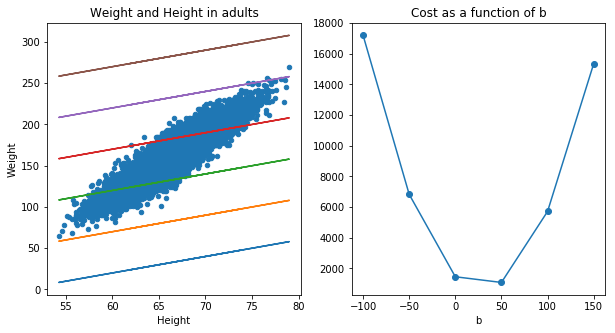

In [20]:
plt.figure(figsize=(10, 5))

# we are going to draw 2 plots in the same figure
# first plot, data and a few lines
ax1 = plt.subplot(121)
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults', ax=ax1)

# let's explore the cost function for a few values of b between -100 and +150
bbs = np.array([-100, -50, 0, 50, 100, 150])
mses = []  # we will append the values of the cost here, for each line
for b in bbs:
    y_pred = line(X, w=2, b=b)
    mse = mean_squared_error(y_true, y_pred.ravel())
    mses.append(mse)
    plt.plot(X, y_pred)

# second plot: Cost function
ax2 = plt.subplot(122)
plt.plot(bbs, mses, 'o-')
plt.title('Cost as a function of b')
plt.xlabel('b')

## Linear Regression with Keras

In [21]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

Using TensorFlow backend.


In [22]:
model = Sequential()

In [23]:
model.add(Dense(1, input_shape=(1,)))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [26]:
model.fit(X, y_true, epochs=30)

Epoch 1/30
10000/10000 [==============================] - 1s 55us/step - loss: 1223.6460
Epoch 2/30
10000/10000 [==============================] - 0s 34us/step - loss: 564.1204
Epoch 3/30
10000/10000 [==============================] - 0s 29us/step - loss: 526.8662
Epoch 4/30
10000/10000 [==============================] - 0s 28us/step - loss: 478.5407
Epoch 5/30
10000/10000 [==============================] - 0s 32us/step - loss: 460.2774
Epoch 6/30
10000/10000 [==============================] - 0s 34us/step - loss: 392.4207
Epoch 7/30
10000/10000 [==============================] - 0s 29us/step - loss: 363.6852
Epoch 8/30
10000/10000 [==============================] - 0s 33us/step - loss: 333.3405
Epoch 9/30
10000/10000 [==============================] - 0s 30us/step - loss: 312.2064
Epoch 10/30
10000/10000 [==============================] - 0s 33us/step - loss: 290.3975
Epoch 11/30
10000/10000 [==============================] - 0s 33us/step - loss: 271.0943
Epoch 12/30
10000/10000 [====

In [27]:
y_pred = model.predict(X)

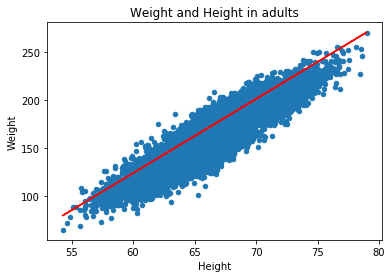

In [28]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [29]:
W, B = model.get_weights()

In [30]:
W

array([[7.734639]], dtype=float32)

In [31]:
B

array([-340.15353], dtype=float32)

## Evaluating Model Performance

In [32]:
from sklearn.metrics import r2_score

In [33]:
print("The R2 score is {:0.3f}".format(r2_score(y_true, y_pred)))

The R2 score is 0.722


### Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y_true,
                                                    test_size=0.2)

In [36]:
len(X_train)

8000

In [37]:
len(X_test)

2000

In [38]:
W[0, 0] = 0.0
B[0] = 0.0
model.set_weights((W, B))

In [39]:
model.fit(X_train, y_train, epochs=50, verbose=0)

In [40]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [41]:
from sklearn.metrics import mean_squared_error as mse

In [42]:
print("The Mean Squared Error on the Train set is:\t{:0.1f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.1f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	328.2
The Mean Squared Error on the Test set is:	324.5


In [43]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.681
The R2 score on the Test set is:	0.686


# Logistic Regression Cost Function

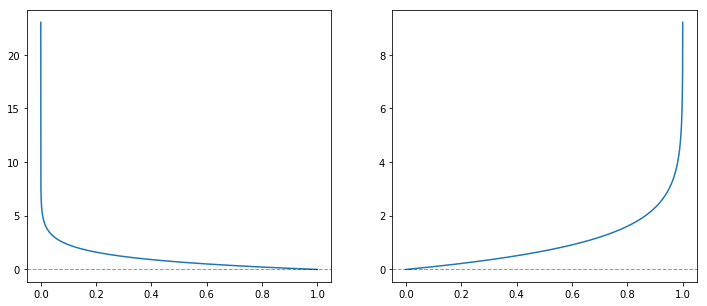

In [44]:
h = np.linspace(1e-10, 1, 10000)

# cost = (y-1)*log(1-y) - y*log(y)

plt.subplots(1, 2, figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(h, -np.log(h))
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=.4)

plt.subplot(1, 2, 2)
plt.plot(h, -np.log(1-h))
plt.axhline(0, color='black', linestyle='--', linewidth=1, alpha=.4)

# Classification

In [45]:
df = pd.read_csv('../data/user_visit_duration.csv')

In [46]:
df.head()

,Time (min),Buy
0,2.000000,0
1,0.683333,0
2,3.216667,1
3,0.900000,0
4,1.533333,1


In [47]:
df['Buy'].value_counts()

1    50
0    50
Name: Buy, dtype: int64

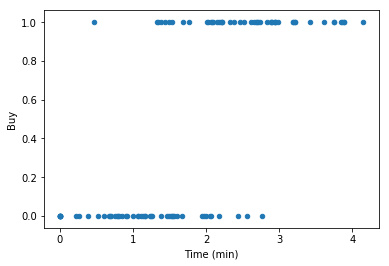

In [48]:
df.plot(kind='scatter', x='Time (min)', y='Buy')

In [49]:
model = Sequential()
model.add(Dense(1, input_shape=(1,), activation='sigmoid'))

In [50]:
model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [52]:
X = df[['Time (min)']].values
y = df['Buy'].values

model.fit(X, y, epochs=25)

Epoch 1/25
100/100 [==============================] - 0s 3ms/step - loss: 0.6417 - acc: 0.5800
Epoch 2/25
100/100 [==============================] - 0s 183us/step - loss: 0.5686 - acc: 0.7100
Epoch 3/25
100/100 [==============================] - 0s 173us/step - loss: 0.5433 - acc: 0.7900
Epoch 4/25
100/100 [==============================] - 0s 173us/step - loss: 0.5206 - acc: 0.7200
Epoch 5/25
100/100 [==============================] - 0s 119us/step - loss: 0.5131 - acc: 0.8300
Epoch 6/25
100/100 [==============================] - 0s 155us/step - loss: 0.4892 - acc: 0.8300
Epoch 7/25
100/100 [==============================] - 0s 128us/step - loss: 0.4744 - acc: 0.8100
Epoch 8/25
100/100 [==============================] - 0s 160us/step - loss: 0.4600 - acc: 0.8200
Epoch 9/25
100/100 [==============================] - 0s 106us/step - loss: 0.4528 - acc: 0.8100
Epoch 10/25
100/100 [==============================] - 0s 99us/step - loss: 0.4630 - acc: 0.8000
Epoch 11/25
100/100 [===========

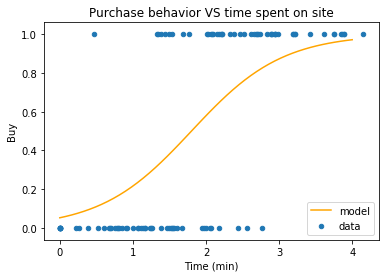

In [53]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, model.predict(temp), color='orange')
plt.legend(['model', 'data'])

In [54]:
temp_class = model.predict(temp) > 0.5

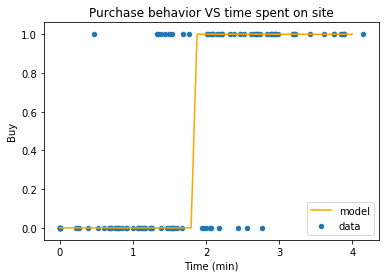

In [55]:
ax = df.plot(kind='scatter', x='Time (min)', y='Buy',
             title='Purchase behavior VS time spent on site')

temp = np.linspace(0, 4)
ax.plot(temp, temp_class, color='orange')
plt.legend(['model', 'data'])

In [56]:
y_pred = model.predict(X)
y_class_pred = y_pred > 0.7

In [57]:
from sklearn.metrics import accuracy_score

In [58]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, y_class_pred)))

The accuracy score is 0.780


### Train/Test split


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [60]:
params = model.get_weights()
params = [np.zeros(w.shape) for w in params]
model.set_weights(params)

In [61]:
print("The accuracy score is {:0.3f}".format(accuracy_score(y, model.predict(X) > 0.5)))

The accuracy score is 0.500


In [62]:
model.fit(X_train, y_train, epochs=25, verbose=0)

In [63]:
print("The train accuracy score is {:0.3f}".format(accuracy_score(y_train, model.predict(X_train) > 0.5)))
print("The test accuracy score is {:0.3f}".format(accuracy_score(y_test, model.predict(X_test) > 0.5)))

The train accuracy score is 0.850
The test accuracy score is 0.750


## Cross Validation

In [64]:
from keras.wrappers.scikit_learn import KerasClassifier

In [65]:
def build_logistic_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(1,), activation='sigmoid'))
    model.compile(SGD(lr=0.5),
                  'binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [66]:
model = KerasClassifier(build_fn=build_logistic_regression_model,
                        epochs=25,
                        verbose=0)

In [67]:
from sklearn.model_selection import cross_val_score, KFold

In [68]:
cv = KFold(3, shuffle=True)

In [69]:
scores = cross_val_score(model, X, y, cv=cv)

In [70]:
scores

array([0.85294118, 0.72727273, 0.87878788])

In [71]:
print("The cross validation accuracy is {:0.4f} ± {:0.4f}".format(scores.mean(), scores.std()))

The cross validation accuracy is 0.8197 ± 0.0662


## Confusion Matrix

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y, y_class_pred)

array([[47,  3],
       [19, 31]])

In [74]:
def pretty_confusion_matrix(y_true, y_pred, labels=["False", "True"]):
    cm = confusion_matrix(y_true, y_pred)
    pred_labels = ['Predicted '+ l for l in labels]
    df = pd.DataFrame(cm, index=labels, columns=pred_labels)
    return df

In [75]:
pretty_confusion_matrix(y, y_class_pred, ['Not Buy', 'Buy'])

,Predicted Not Buy,Predicted Buy
Not Buy,47,3
Buy,19,31


In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [77]:
print("Precision:\t{:0.3f}".format(precision_score(y, y_class_pred)))
print("Recall:  \t{:0.3f}".format(recall_score(y, y_class_pred)))
print("F1 Score:\t{:0.3f}".format(f1_score(y, y_class_pred)))
print("Accuracy:\t{:0.3f}".format(accuracy_score(y, y_class_pred)))

Precision:	0.912
Recall:  	0.620
F1 Score:	0.738
Accuracy:	0.780


In [78]:
from sklearn.metrics import classification_report

In [79]:
print(classification_report(y, y_class_pred))

              precision    recall  f1-score   support

           0       0.71      0.94      0.81        50
           1       0.91      0.62      0.74        50

   micro avg       0.78      0.78      0.78       100
   macro avg       0.81      0.78      0.77       100
weighted avg       0.81      0.78      0.77       100



## Feature Preprocessing

### Categorical Features

In [80]:
df = pd.read_csv('../data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [81]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [82]:
pd.get_dummies(df['Gender'], prefix='Gender').head()

,Gender_Female,Gender_Male
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


## Feature Transformations

#### 1) Rescale with fixed factor

In [83]:
df['Height (feet)'] = df['Height']/12.0
df['Weight (100 lbs)'] = df['Weight']/100.0

In [84]:
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs)
count,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61
std,3.85,32.11,0.32,0.32
min,54.26,64.70,4.52,0.65
25%,63.51,135.82,5.29,1.36
50%,66.32,161.21,5.53,1.61
75%,69.17,187.17,5.76,1.87
max,79.00,269.99,6.58,2.70


#### MinMax normalization

In [85]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
df['Weight_mms'] = mms.fit_transform(df[['Weight']])
df['Height_mms'] = mms.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49
std,3.85,32.11,0.32,0.32,0.16,0.16
min,54.26,64.70,4.52,0.65,0.00,0.00
25%,63.51,135.82,5.29,1.36,0.35,0.37
50%,66.32,161.21,5.53,1.61,0.47,0.49
75%,69.17,187.17,5.76,1.87,0.60,0.60
max,79.00,269.99,6.58,2.70,1.00,1.00


#### 3) Standard normalization

In [86]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df['Weight_ss'] = ss.fit_transform(df[['Weight']])
df['Height_ss'] = ss.fit_transform(df[['Height']])
df.describe().round(2)

,Height,Weight,Height (feet),Weight (100 lbs),Weight_mms,Height_mms,Weight_ss,Height_ss
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,66.37,161.44,5.53,1.61,0.47,0.49,0.00,0.00
std,3.85,32.11,0.32,0.32,0.16,0.16,1.00,1.00
min,54.26,64.70,4.52,0.65,0.00,0.00,-3.01,-3.15
25%,63.51,135.82,5.29,1.36,0.35,0.37,-0.80,-0.74
50%,66.32,161.21,5.53,1.61,0.47,0.49,-0.01,-0.01
75%,69.17,187.17,5.76,1.87,0.60,0.60,0.80,0.73
max,79.00,269.99,6.58,2.70,1.00,1.00,3.38,3.28


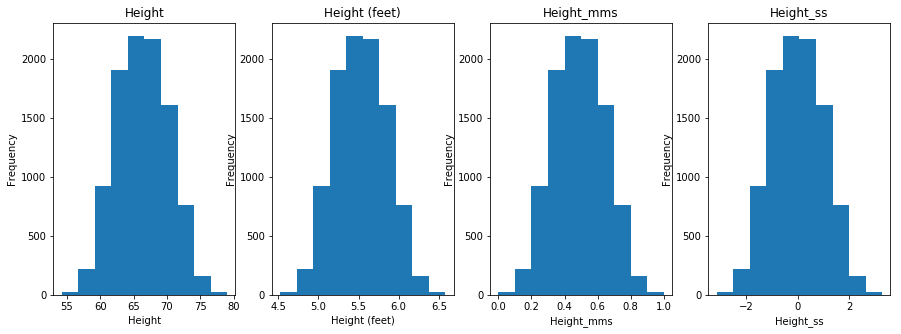

In [87]:
plt.figure(figsize=(15, 5))

for i, feature in enumerate(['Height', 'Height (feet)', 'Height_mms', 'Height_ss']):
    plt.subplot(1, 4, i+1)
    df[feature].plot(kind='hist', title=feature)
    plt.xlabel(feature)

# Machine Learning Exercises

## Exercise 1

You've just been hired at a real estate investment firm and they would like you to build a model for pricing houses. You are given a dataset that contains data for house prices and a few features like number of bedrooms, size in square feet and age of the house. Let's see if you can build a model that is able to predict the price. In this exercise we extend what we have learned about linear regression to a dataset with more than one feature. Here are the steps to complete it:

1. Load the dataset ../data/housing-data.csv
- plot the histograms for each feature
- create 2 variables called X and y: X shall be a matrix with 3 columns (sqft,bdrms,age) and y shall be a vector with 1 column (price)
- create a linear regression model in Keras with the appropriate number of inputs and output
- split the data into train and test with a 20% test size
- train the model on the training set and check its accuracy on training and test set
- how's your model doing? Is the loss growing smaller?
- try to improve your model with these experiments:
    - normalize the input features with one of the rescaling techniques mentioned above
    - use a different value for the learning rate of your model
    - use a different optimizer
- once you're satisfied with training, check the R2score on the test set

In [88]:
df = pd.read_csv('../data/housing-data.csv')
df.head()

,sqft,bdrms,age,price
0,2104,3,70,399900
1,1600,3,28,329900
2,2400,3,44,369000
3,1416,2,49,232000
4,3000,4,75,539900


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
sqft     47 non-null int64
bdrms    47 non-null int64
age      47 non-null int64
price    47 non-null int64
dtypes: int64(4)
memory usage: 1.5 KB


In [90]:
df.describe()

,sqft,bdrms,age,price
count,47.000000,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,42.744681,340412.659574
std,794.702354,0.760982,22.873440,125039.899586
min,852.000000,1.000000,5.000000,169900.000000
25%,1432.000000,3.000000,24.500000,249900.000000
50%,1888.000000,3.000000,44.000000,299900.000000
75%,2269.000000,4.000000,61.500000,384450.000000
max,4478.000000,5.000000,79.000000,699900.000000


In [91]:
def rescale_features(df, scaler, *features):
    for feature in features:
        df[feature] = scaler.fit_transform(df[[feature]])

In [92]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

original_df = df.copy()

rescale_features(df, MinMaxScaler(), 'sqft', 'bdrms', 'age', 'price')
df.describe().round(2)

/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/yagotome/anaconda3/envs/ztdl/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,sqft,bdrms,age,price
count,47.00,47.00,47.00,47.00
mean,0.32,0.54,0.51,0.32
std,0.22,0.19,0.31,0.24
min,0.00,0.00,0.00,0.00
25%,0.16,0.50,0.26,0.15
50%,0.29,0.50,0.53,0.25
75%,0.39,0.75,0.76,0.40
max,1.00,1.00,1.00,1.00


In [93]:
def plot_hist(df):
    _, ax = plt.subplots(2, 2, figsize=(12,8))

    df['sqft'].plot(kind='hist', ax=ax[0][0], title='sqft')
    df['bdrms'].plot(kind='hist', ax=ax[0][1], title='bdrms')
    df['age'].plot(kind='hist', ax=ax[1][0], title='age')
    df['price'].plot(kind='hist', ax=ax[1][1], title='price')

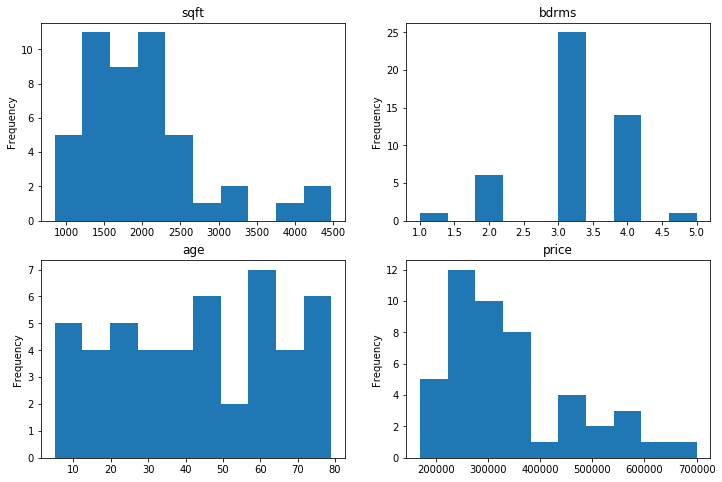

In [94]:
plot_hist(original_df)

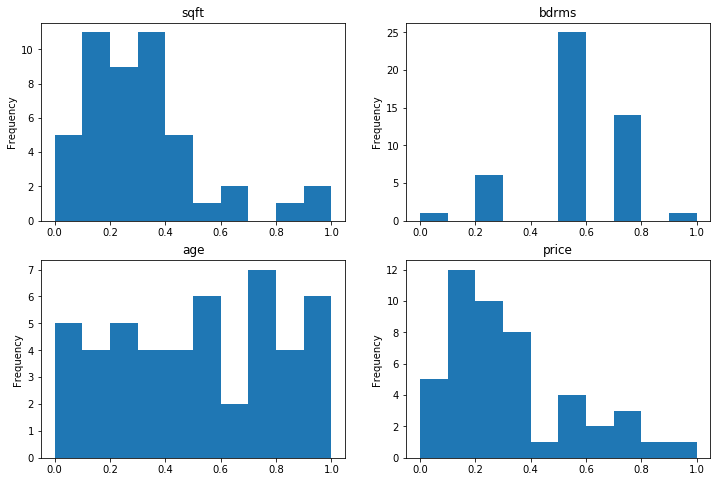

In [95]:
plot_hist(df)

In [96]:
X = df[['sqft', 'bdrms', 'age']].values
X.shape

(47, 3)

In [97]:
y = df['price'].values
y.shape

(47,)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [100]:
from keras.optimizers import Adam, SGD, Adagrad, Adamax
def build_linear_regression_model():
    model = Sequential()
    model.add(Dense(1, input_shape=(3,)))
    model.compile(Adagrad(lr=0.99), 'mean_squared_error')
    return model

In [101]:
model = build_linear_regression_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [102]:
# params = model.get_weights()
# params = [np.zeros(w.shape) for w in params]
# model.set_weights(params)

model.fit(X_train, y_train, epochs=250, verbose=1)

Epoch 1/250
37/37 [==============================] - 0s 7ms/step - loss: 0.5115
Epoch 2/250
37/37 [==============================] - 0s 108us/step - loss: 0.6031
Epoch 3/250
37/37 [==============================] - 0s 209us/step - loss: 0.1113
Epoch 4/250
37/37 [==============================] - 0s 166us/step - loss: 0.0451
Epoch 5/250
37/37 [==============================] - 0s 135us/step - loss: 0.0385
Epoch 6/250
37/37 [==============================] - 0s 166us/step - loss: 0.0346
Epoch 7/250
37/37 [==============================] - 0s 148us/step - loss: 0.0725
Epoch 8/250
37/37 [==============================] - 0s 127us/step - loss: 0.0689
Epoch 9/250
37/37 [==============================] - 0s 121us/step - loss: 0.0339
Epoch 10/250
37/37 [==============================] - 0s 98us/step - loss: 0.0220
Epoch 11/250
37/37 [==============================] - 0s 104us/step - loss: 0.0303
Epoch 12/250
37/37 [==============================] - 0s 72us/step - loss: 0.0209
Epoch 13/250
37/3

37/37 [==============================] - 0s 107us/step - loss: 0.0146
Epoch 101/250
37/37 [==============================] - 0s 159us/step - loss: 0.0164
Epoch 102/250
37/37 [==============================] - 0s 266us/step - loss: 0.0169
Epoch 103/250
37/37 [==============================] - 0s 98us/step - loss: 0.0151
Epoch 104/250
37/37 [==============================] - 0s 124us/step - loss: 0.0155
Epoch 105/250
37/37 [==============================] - 0s 85us/step - loss: 0.0189
Epoch 106/250
37/37 [==============================] - 0s 93us/step - loss: 0.0156
Epoch 107/250
37/37 [==============================] - 0s 83us/step - loss: 0.0230
Epoch 108/250
37/37 [==============================] - 0s 177us/step - loss: 0.0147
Epoch 109/250
37/37 [==============================] - 0s 115us/step - loss: 0.0143
Epoch 110/250
37/37 [==============================] - 0s 110us/step - loss: 0.0185
Epoch 111/250
37/37 [==============================] - 0s 91us/step - loss: 0.0148
Epoch 112/2

37/37 [==============================] - 0s 87us/step - loss: 0.0215
Epoch 199/250
37/37 [==============================] - 0s 85us/step - loss: 0.0145
Epoch 200/250
37/37 [==============================] - 0s 123us/step - loss: 0.0188
Epoch 201/250
37/37 [==============================] - 0s 164us/step - loss: 0.0144
Epoch 202/250
37/37 [==============================] - 0s 232us/step - loss: 0.0145
Epoch 203/250
37/37 [==============================] - 0s 146us/step - loss: 0.0147
Epoch 204/250
37/37 [==============================] - 0s 96us/step - loss: 0.0144
Epoch 205/250
37/37 [==============================] - 0s 85us/step - loss: 0.0143
Epoch 206/250
37/37 [==============================] - 0s 192us/step - loss: 0.0173
Epoch 207/250
37/37 [==============================] - 0s 95us/step - loss: 0.0327
Epoch 208/250
37/37 [==============================] - 0s 74us/step - loss: 0.0164
Epoch 209/250
37/37 [==============================] - 0s 80us/step - loss: 0.0169
Epoch 210/250

In [103]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [104]:
from sklearn.metrics import mean_squared_error as mse, r2_score

In [105]:
print("The Mean Squared Error on the Train set is:\t{:0.2f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.2f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	0.02
The Mean Squared Error on the Test set is:	0.02


In [106]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.641
The R2 score on the Test set is:	0.578


In [107]:
df['sqft1000'] = original_df['sqft']/1000.0
df['age10'] = original_df['age']/10.0
df['price100k'] = original_df['price']/1e5

In [108]:
X = df[['sqft1000', 'bdrms', 'age10']].values
y = df['price100k'].values

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
model = build_linear_regression_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 4         
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [111]:
model.fit(X_train, y_train, epochs=250, verbose=1)

Epoch 1/250
37/37 [==============================] - 0s 7ms/step - loss: 21.5469
Epoch 2/250
37/37 [==============================] - 0s 217us/step - loss: 4.2620
Epoch 3/250
37/37 [==============================] - 0s 161us/step - loss: 1.4580
Epoch 4/250
37/37 [==============================] - 0s 99us/step - loss: 1.0991
Epoch 5/250
37/37 [==============================] - 0s 85us/step - loss: 0.9917
Epoch 6/250
37/37 [==============================] - 0s 103us/step - loss: 1.1837
Epoch 7/250
37/37 [==============================] - 0s 84us/step - loss: 1.3409
Epoch 8/250
37/37 [==============================] - 0s 90us/step - loss: 0.6048
Epoch 9/250
37/37 [==============================] - 0s 71us/step - loss: 0.6591
Epoch 10/250
37/37 [==============================] - 0s 74us/step - loss: 0.5080
Epoch 11/250
37/37 [==============================] - 0s 314us/step - loss: 0.6358
Epoch 12/250
37/37 [==============================] - 0s 237us/step - loss: 0.4908
Epoch 13/250
37/37 [

37/37 [==============================] - 0s 154us/step - loss: 0.4116
Epoch 101/250
37/37 [==============================] - 0s 101us/step - loss: 0.4967
Epoch 102/250
37/37 [==============================] - 0s 143us/step - loss: 0.4181
Epoch 103/250
37/37 [==============================] - 0s 259us/step - loss: 0.4074
Epoch 104/250
37/37 [==============================] - 0s 299us/step - loss: 0.4265
Epoch 105/250
37/37 [==============================] - 0s 104us/step - loss: 0.5331
Epoch 106/250
37/37 [==============================] - 0s 305us/step - loss: 0.7284
Epoch 107/250
37/37 [==============================] - 0s 156us/step - loss: 0.7917
Epoch 108/250
37/37 [==============================] - 0s 288us/step - loss: 0.5572
Epoch 109/250
37/37 [==============================] - 0s 108us/step - loss: 0.4443
Epoch 110/250
37/37 [==============================] - 0s 128us/step - loss: 0.4064
Epoch 111/250
37/37 [==============================] - 0s 100us/step - loss: 0.4080
Epoch 

37/37 [==============================] - 0s 83us/step - loss: 0.4052
Epoch 199/250
37/37 [==============================] - 0s 143us/step - loss: 0.4095
Epoch 200/250
37/37 [==============================] - 0s 87us/step - loss: 0.4240
Epoch 201/250
37/37 [==============================] - 0s 91us/step - loss: 0.4511
Epoch 202/250
37/37 [==============================] - 0s 356us/step - loss: 0.4909
Epoch 203/250
37/37 [==============================] - 0s 95us/step - loss: 0.4267
Epoch 204/250
37/37 [==============================] - 0s 186us/step - loss: 0.5653
Epoch 205/250
37/37 [==============================] - 0s 82us/step - loss: 0.4216
Epoch 206/250
37/37 [==============================] - 0s 374us/step - loss: 0.4355
Epoch 207/250
37/37 [==============================] - 0s 108us/step - loss: 0.4108
Epoch 208/250
37/37 [==============================] - 0s 148us/step - loss: 0.4808
Epoch 209/250
37/37 [==============================] - 0s 765us/step - loss: 0.4040
Epoch 210/2

In [112]:
y_train_pred = model.predict(X_train).ravel()
y_test_pred = model.predict(X_test).ravel()

In [113]:
print("The Mean Squared Error on the Train set is:\t{:0.2f}".format(mse(y_train, y_train_pred)))
print("The Mean Squared Error on the Test set is:\t{:0.2f}".format(mse(y_test, y_test_pred)))

The Mean Squared Error on the Train set is:	0.41
The Mean Squared Error on the Test set is:	0.49


In [114]:
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(y_train, y_train_pred)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(y_test, y_test_pred)))

The R2 score on the Train set is:	0.664
The R2 score on the Test set is:	0.809


## Exercise 2

Your boss was extremely happy with your work on the housing price prediction model and decided to entrust you with a more challenging task. They've seen a lot of people leave the company recently and they would like to understand why that's happening. They have collected historical data on employees and they would like you to build a model that is able to predict which employee will leave next. The would like a model that is better than random guessing. They also prefer false negatives than false positives, in this first phase. Fields in the dataset include:

- Employee satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent at the company
- Whether they have had a work accident
- Whether they have had a promotion in the last 5 years
- Department
- Salary
- Whether the employee has left

Your goal is to predict the binary outcome variable `left` using the rest of the data. Since the outcome is binary, this is a classification problem. Here are some things you may want to try out:

1. load the dataset at ../data/HR_comma_sep.csv, inspect it with `.head()`, `.info()` and `.describe()`.
- Establish a benchmark: what would be your accuracy score if you predicted everyone stay?
- Check if any feature needs rescaling. You may plot a histogram of the feature to decide which rescaling method is more appropriate.
- convert the categorical features into binary dummy columns. You will then have to combine them with the numerical features using `pd.concat`.
- do the usual train/test split with a 20% test size
- play around with learning rate and optimizer
- check the confusion matrix, precision and recall
- check if you still get the same results if you use a 5-Fold cross validation on all the data
- Is the model good enough for your boss?

As you will see in this exercise, the a logistic regression model is not good enough to help your boss. In the next chapter we will learn how to go beyond linear models.

This dataset comes from https://www.kaggle.com/ludobenistant/hr-analytics/ and is released under [CC BY-SA 4.0 License](https://creativecommons.org/licenses/by-sa/4.0/).